In [401]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import umap

from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
import os
import gc

In [2]:
os.chdir("Z:/lab_research/RES-Folder-UPOD/Celldynclustering")

In [3]:
celldyn = pd.read_sas("E_ResearchData/2_ResearchData/celldyn.sas7bdat")

D:\VENVS\base\lib\site-packages\pandas\io\sas\sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")
D:\VENVS\base\lib\site-packages\pandas\io\sas\sas7bdat.py:809: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._string_chunk[js, :]


In [4]:
meas_columns = [c for c in celldyn.columns if 'c_b' in c]
mode_columns = [c for c in celldyn.columns if 'c_m' in c]
celldyn = celldyn[meas_columns+mode_columns]
celldyn_full = celldyn[celldyn[meas_columns].isna().sum(axis=1)==0] # c_mode_cbc & c_mode_rtc are flagged

## Full case

## No scaling, No feature selection, No feature recombinations

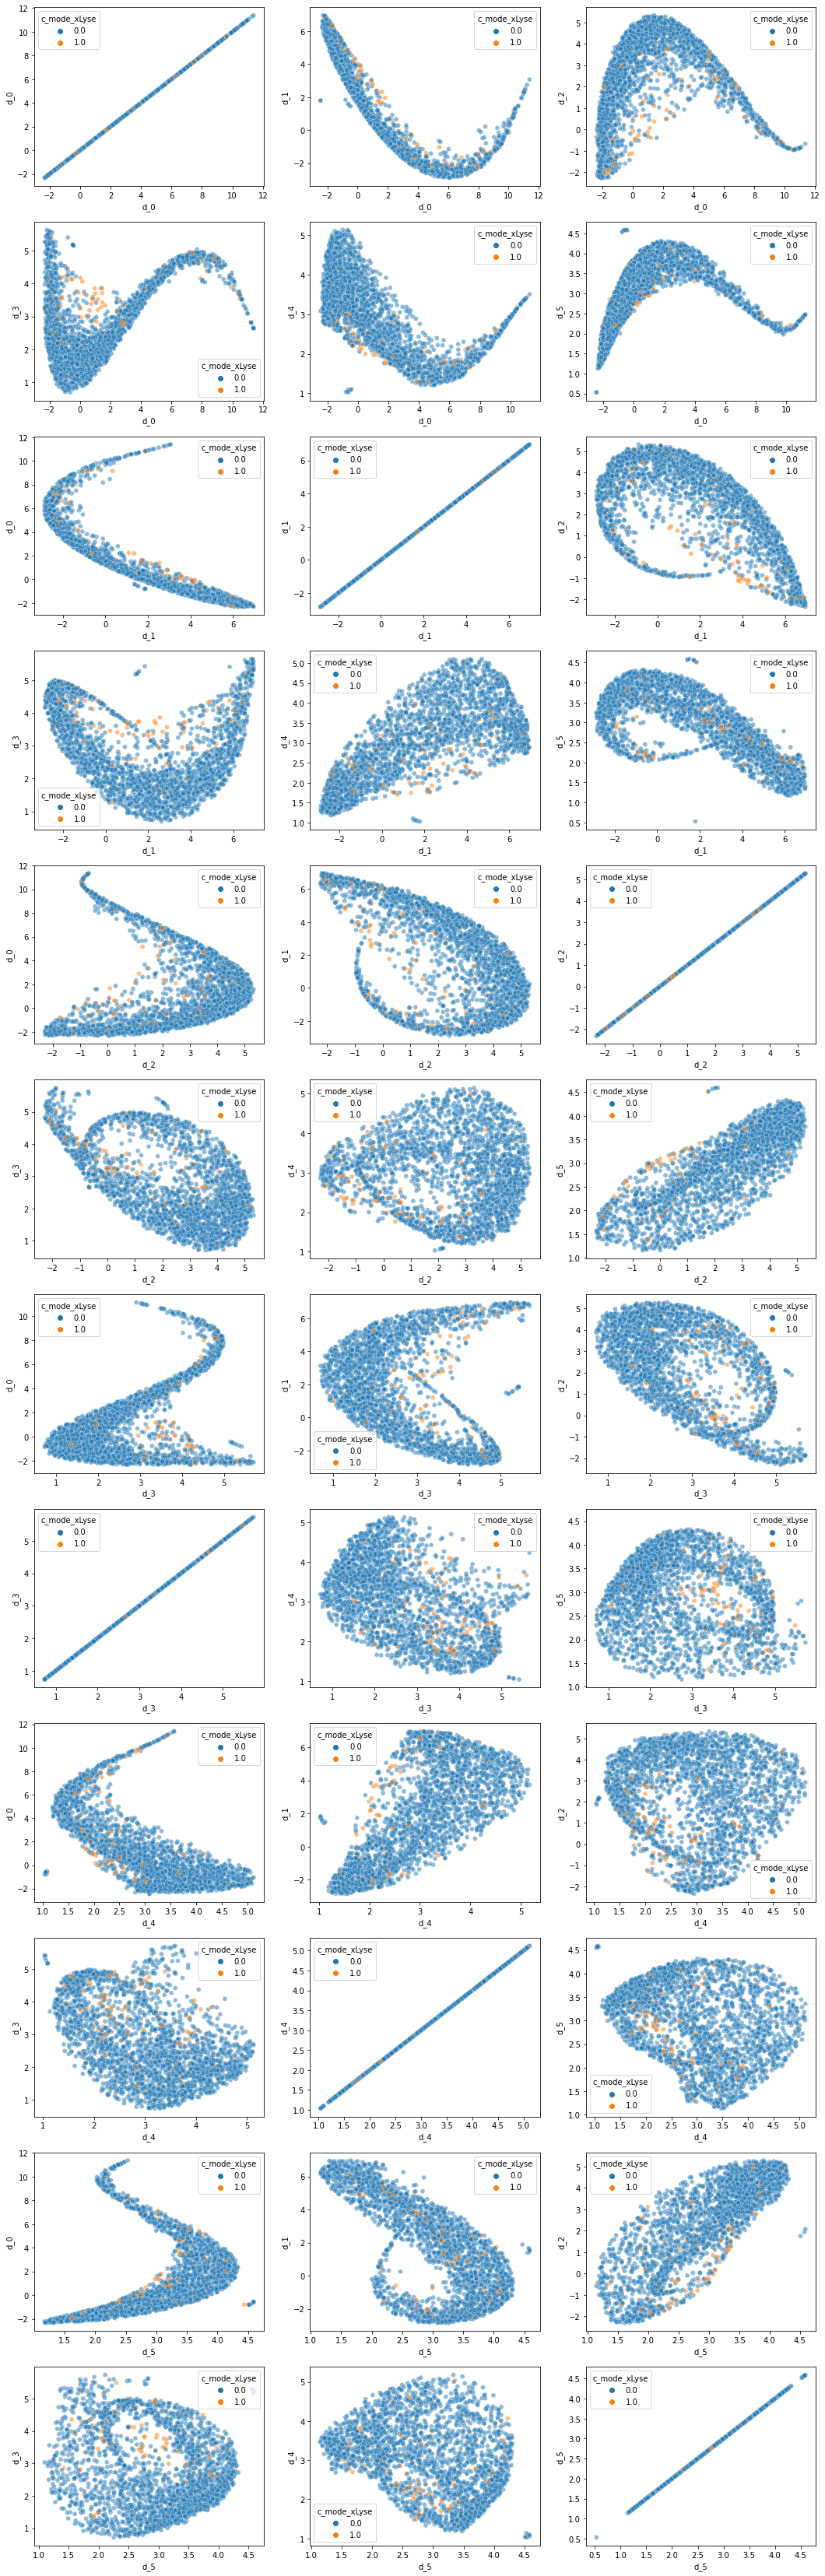

In [5]:
sample_df  = celldyn_full.sample(100000)
reduce_dim = 6
embedder_full = umap.UMAP(n_components=reduce_dim, n_neighbors=51)
embedder_full.fit(sample_df[meas_columns])

plot_df = pd.DataFrame(data=embedder_full.embedding_, columns=['d_0', 'd_1', 'd_2',
                                                               'd_3', 'd_4', 'd_5'], index=sample_df.index)
plot_df = plot_df.join(sample_df[mode_columns])

reduce_dim = min([6, reduce_dim])
num_rows = int(np.ceil((reduce_dim)**2/3))
fig, ax = plt.subplots(ncols=3, nrows=num_rows, figsize=(18, 5*num_rows))
k = 0
for ki in range(reduce_dim):
    for kj in range(reduce_dim): 
        i = int(k/3)
        j = k%3
        if num_rows > 1:
            sns.scatterplot(data=plot_df.sample(2500), x='d_'+str(ki), y='d_'+str(kj), ax=ax[i,j], 
                            hue='c_mode_xLyse', alpha=0.5)
        else:
            sns.scatterplot(data=plot_df.sample(2500), x='d_'+str(ki), y='d_'+str(kj), ax=ax[k], 
                            hue='c_mode_xLyse', alpha=0.5)
        k += 1

In [9]:
gc.collect()

941

## With scaling, With manual feature selection, No feature recombinations

In [413]:
sample_df  = celldyn_full.sample(100000)

In [414]:
num = 7
sample_df.iloc[:, num].max(), sample_df.iloc[:, num].median(), sample_df.iloc[:, num].quantile(0.999), sample_df.columns[num]

(600.578, 1.6500000000000001, 87.74171670000045, 'c_b_lyme')

<AxesSubplot:>

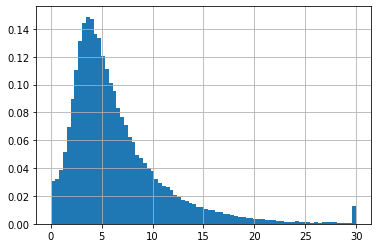

In [415]:
col = 'c_b_neu'
v =  sample_df.loc[:, col]
v999 = v.quantile(0.999)
v001 = v.quantile(0.001)
#sample_df.iloc[:, num].hist(bins=40, density=True)
np.maximum(0.,(np.minimum(30, v))).hist(bins=80, density=True)
#np.maximum(v001,(np.minimum(v999, v))).hist(bins=80, density=True)

In [425]:
# c_b_wvf: consider dropping
# c_b_bnd: consider dropping
# c_b_ig: consider dropping
# c_b_vlym: consider dropping
# c_b_blst: consider dropping
# c_b_nrbc: consider dropping
# c_b_pbnd: consider dropping
# c_b_pig: consider dropping
# c_b_pvlym: consider dropping
# c_b_pnrbc: consider dropping
# c_b_pblst: consider dropping

# c_b_wbc: np.maximum(0.,(np.minimum(40,..
# c_b_neu: np.maximum(0.,(np.minimum(30,..
# c_b_seg: np.minimum(40, celldyn['c_b_seg'])
# c_b_lym: np.minimum(10, celldyn['c_b_lym'])
# c_b_lyme: np.minimum(10, celldyn['c_b_lyme'])

# c_b_mon: np.minimum(5, celldyn['c_b_mon'])
# c_b_mone: np.minimum(5, celldyn['c_b_mone'])
# c_b_eos: np.minimum(5, celldyn['c_b_eos'])
# c_b_bas: np.minimum(0.25, celldyn['c_b_bas'])
# c_b_pmon: np.minimum(40, celldyn['c_b_pmon'])
# c_b_pmone: np.minimum(40, celldyn['c_b_pmone'])
# c_b_peos: np.minimum(15, celldyn['c_b_peos'])
# c_b_pbas: np.minimum(2, celldyn['c_b_pbas'])
# c_b_rdw: np.minimum(30, celldyn['c_b_rdw'])
# c_b_pMIC: np.minimum(13, celldyn['c_b_pMIC'])
# c_b_pMAC: np.minimum(25, celldyn['c_b_pMAC'])
# c_b_mch_Usa: np.minimum(50, celldyn['c_b_mch_Usa'])
# c_b_mchc_usa: np.minimum(50, celldyn['c_b_mchc_usa'])
# c_b_ht: np.minimum(60, celldyn['c_b_ht'])
# c_b_plto: np.minimum(800, celldyn['c_b_plto'])
# c_b_plti: np.minimum(800, celldyn['c_b_plti'])
# c_b_mpv: np.minimum(15, celldyn['c_b_mpv'])
# c_b_pct: np.minimum(0.7, celldyn['c_b_pct'])

# c_b_pdw: np.maximum(12,(np.minimum(20..
# c_b_retc: np.maximum(0,(np.minimum(300..
# c_b_pretc: np.maximum(0,(np.minimum(8..
# c_b_irf: np.maximum(0,(np.minimum(0.8..
# c_b_pHPO: np.maximum(0,(np.minimum(40..
# c_b_pHPR: np.maximum(0,(np.minimum(1..
# c_b_HDW: np.maximum(4,(np.minimum(15..
# c_b_MCVr: np.maximum(60,(np.minimum(140..
# c_b_MCHr: np.maximum(15,(np.minimum(40..
# c_b_MCHCr: np.maximum(22,(np.minimum(36..
# c_b_prP: np.maximum(0,(np.minimum(15..
# c_b_namn: np.maximum(120,(np.minimum(200,..
# c_b_nacv: np.maximum(0,(np.minimum(5,..
# c_b_nimn: np.maximum(100,(np.minimum(170,..
# c_b_nicv: np.maximum(0,(np.minimum(7,..
# c_b_npmn: np.maximum(50,(np.minimum(175,..
# c_b_npcv: np.maximum(0,(np.minimum(16,..
# c_b_ndmn: np.maximum(5,(np.minimum(45,..
# c_b_nfmn: np.maximum(60,(np.minimum(100,..
# c_b_nfcv: np.maximum(v001,(np.minimum(v999,..
# c_b_Lamn: np.maximum(v001,(np.minimum(v999,..
# c_b_Lacv: np.maximum(v001,(np.minimum(v999,...
# c_b_Limn: np.maximum(v001,(np.minimum(v999,...
# c_b_Licv: np.maximum(0,(np.minimum(10,..
# c_b_Pimn: np.maximum(v001,(np.minimum(v999,..
# c_b_Picv: np.maximum(12,(np.minimum(24,..
# c_b_Ppmn: np.maximum(105,(np.minimum(140,..
# c_b_Ppcv: np.maximum(10,(np.minimum(25,..
# c_b_rbcimn: np.maximum(v001,(np.minimum(v999,..
# c_b_rbcicv: np.maximum(v001,(np.minimum(v999,..
# c_b_rbcfmn: np.maximum(v001,(np.minimum(v999,..
# c_b_rbcfcv: np.maximum(5,(np.minimum(23,..
# c_b_rtcfmn: np.maximum(v001,(np.minimum(v999,..
# c_b_rtcfcv: np.maximum(v001,(np.minimum(v999,..
# c_b_hb: np.maximum(v001,(np.minimum(v999,..
# c_b_mch: np.maximum(v001,(np.minimum(v999,..
# c_b_mchc: np.maximum(0.17,(np.minimum(0.25,..

# c_b_pneu: fine as is?
# c_b_pseg: fine as is?
# c_b_plym: fine as is?
# c_b_plyme: fine as is?
# c_b_rbci: fine as is?
# c_b_rbco: fine as is?
# c_b_hgb_usa: fine as is?
# c_b_mcv: fine as is?

droplist = ['c_b_wvf', 'c_b_bnd', 'c_b_ig', 'c_b_vlym', 'c_b_blst', 'c_b_pblst'
            'c_b_nrbc', 'c_b_pbnd', 'c_b_pig', 'c_b_pvlym', 'c_b_pnrbc']

scaler = FunctionTransformer(func=lambda x: np.maximum(np.quantile(x,0.001), np.minimum(np.quantile(x, 0.999), x)))
final_columns = list(set(meas_columns)-set(droplist))

In [ ]:
reduce_dim = 6
embedder_full = umap.UMAP(n_components=reduce_dim, n_neighbors=51)
le_pipe = Pipeline([('scaler_1', scaler), 
                    ('scaler_2', StandardScaler()),
                    ('embedder', embedder_full)])

le_pipe.fit(sample_df[final_columns])

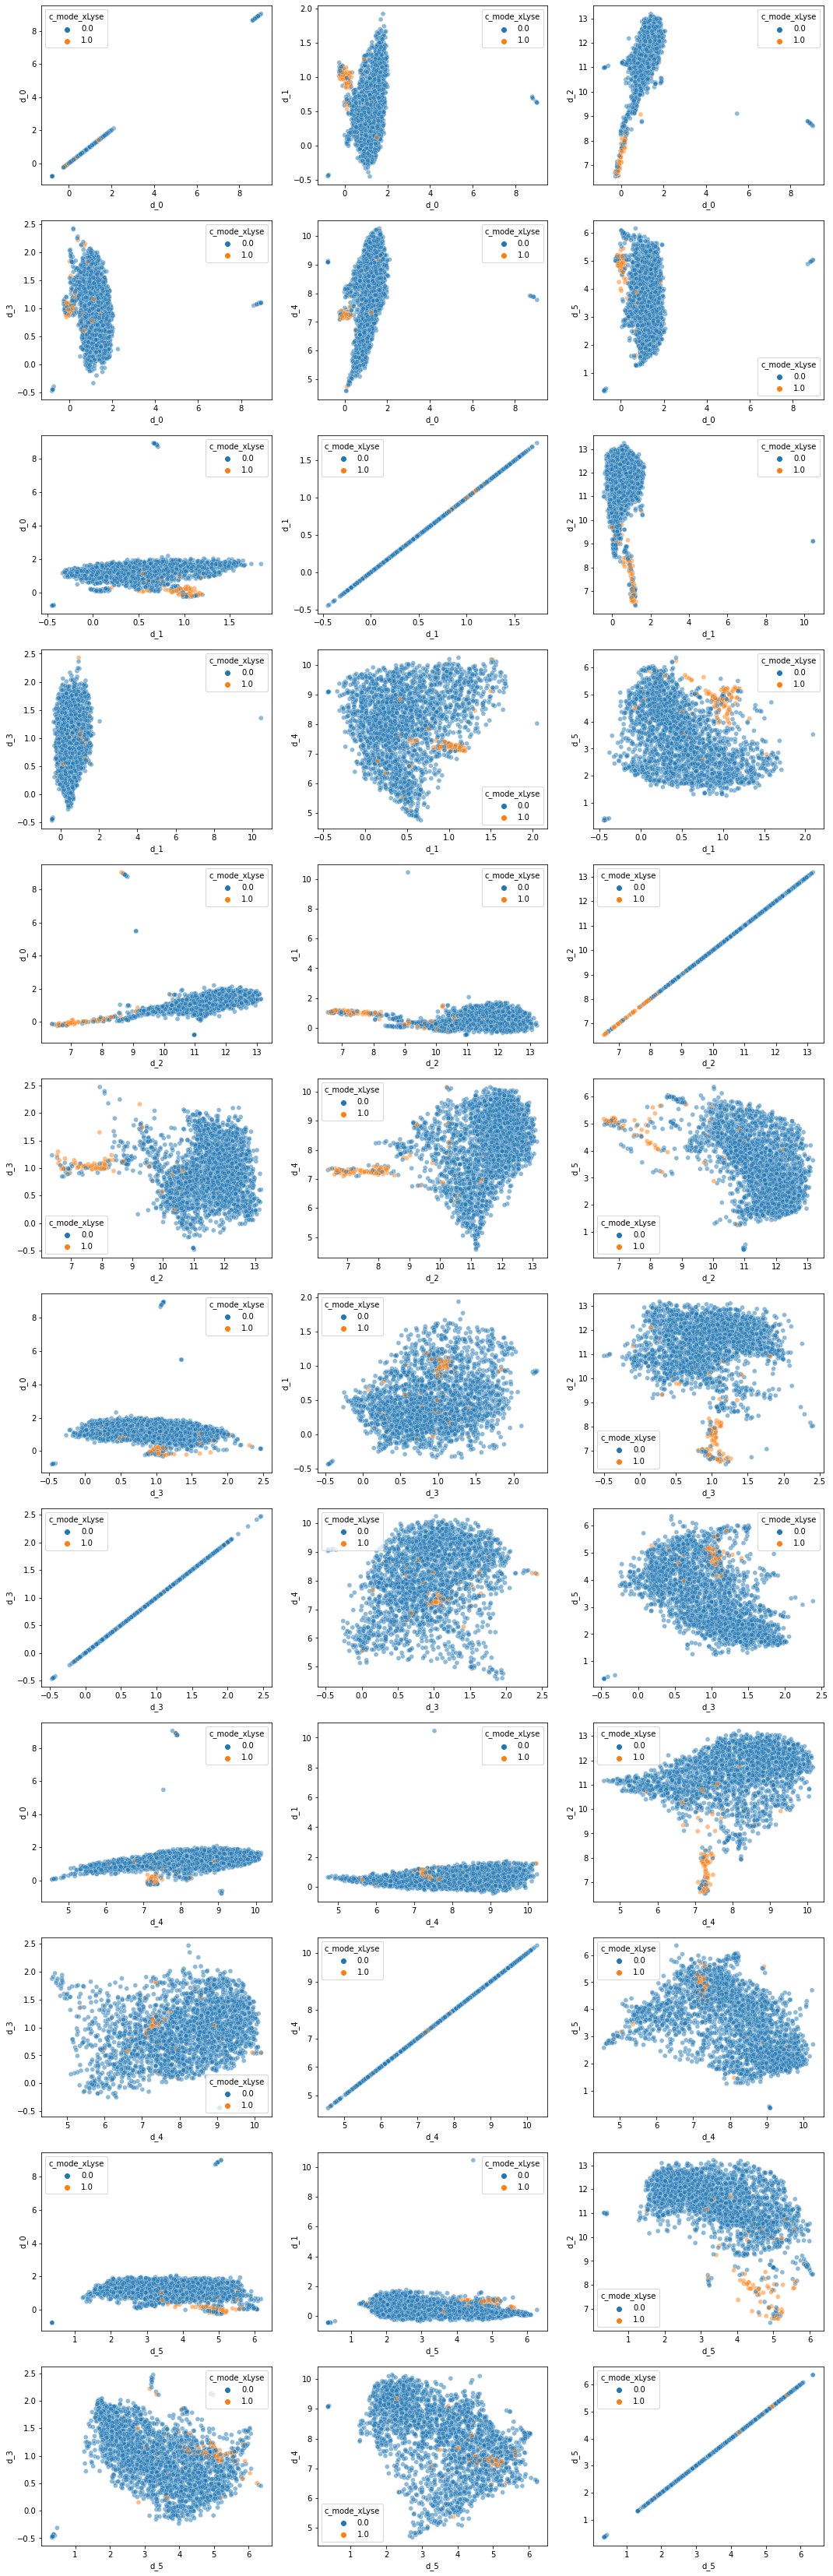

In [432]:
plot_df = pd.DataFrame(data=le_pipe.named_steps['embedder'].embedding_, columns=['d_0', 'd_1', 'd_2',
                                                               'd_3', 'd_4', 'd_5'], index=sample_df.index)
plot_df = plot_df.join(sample_df[mode_columns])

reduce_dim = min([6, reduce_dim])
num_rows = int(np.ceil((reduce_dim)**2/3))
fig, ax = plt.subplots(ncols=3, nrows=num_rows, figsize=(18, 5*num_rows))
k = 0
for ki in range(reduce_dim):
    for kj in range(reduce_dim): 
        i = int(k/3)
        j = k%3
        if num_rows > 1:
            sns.scatterplot(data=plot_df.sample(2500), x='d_'+str(ki), y='d_'+str(kj), ax=ax[i,j], 
                            hue='c_mode_xLyse', alpha=0.5)
        else:
            sns.scatterplot(data=plot_df.sample(2500), x='d_'+str(ki), y='d_'+str(kj), ax=ax[k], 
                            hue='c_mode_xLyse', alpha=0.5)
        k += 1